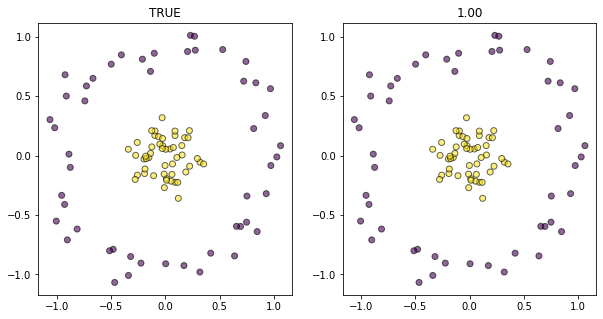

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X, y = make_circles(noise=0.1, factor=0.2, random_state=1)

fig, axes = plt.subplots(1,2)
fig.set_size_inches((2*5,5))

axes[0].set_title(f'TRUE')
axes[0].scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolors='k')

gnb = GaussianNB().fit(X,y)
y_pred = gnb.predict(X)
axes[1].set_title(f'{accuracy_score(y, y_pred):.2f}')
axes[1].scatter(X[:, 0], X[:, 1], c=y_pred, alpha=0.6, edgecolors='k')
plt.show()

predictor = {            
    "priors" : gnb.class_prior_.tolist(),
    "sigmas" : gnb.sigma_.tolist(),
    "theta"  : gnb.theta_.tolist(),
    "classes": gnb.classes_.tolist(),
}

data = {
    "features"   : X.tolist(),
    "prediction" : gnb.predict(X.tolist()).tolist(),
}   

with open(f'predictor.json', 'w') as f:
    f.write(json.dumps(predictor, indent=4))

with open(f'data.json', 'w') as f:
    f.write(json.dumps(data, indent=4))